# Plant Disease Prediction

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

## Data Exploration

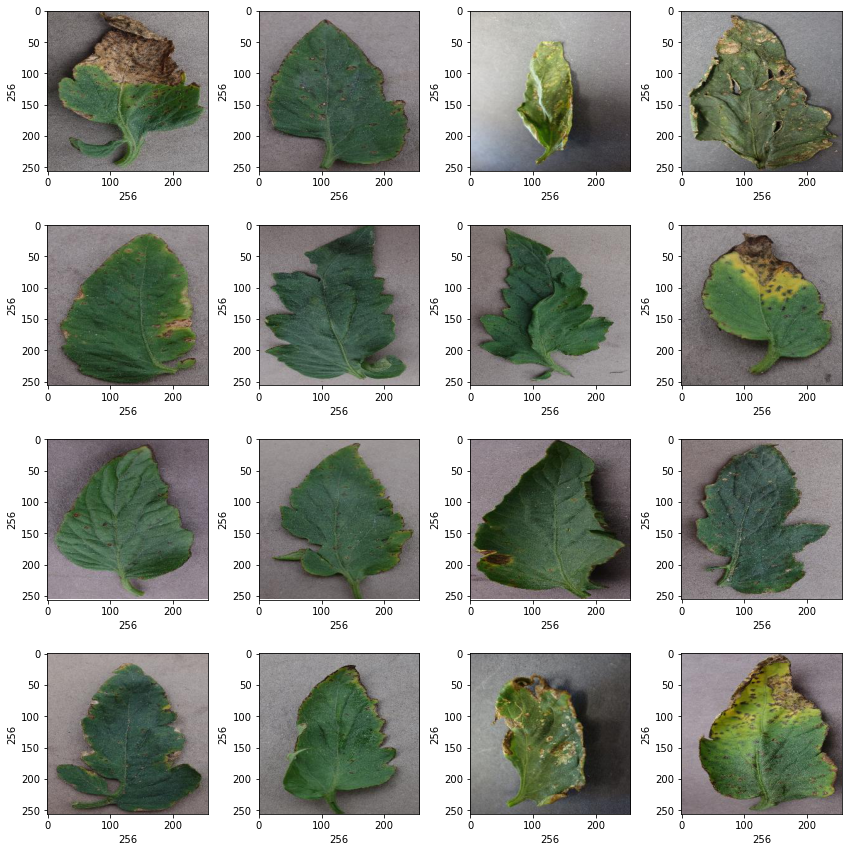

In [9]:
plt.figure(figsize=(12,12))
path = "S:/00/0 ML/7. Project-6 Project On Plant Disease Prediction/plant_images_data/Tomato___Bacterial_Spot"

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # Image Width
    plt.ylabel(rand_img.shape[0], fontsize = 10) # Image Height
    

### Convert Images to NumPy Array

In [29]:
# Function to convert images into a numpy array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
    
        if image is not None:
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        
        else:
            return np.array([])
    
    except Exception as e:
        print(f"Error: {e}")
        return None

In [30]:
dir = "S:/00/0 ML/7. Project-6 Project On Plant Disease Prediction/plant_images_data"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

# Converting Image to Array
for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

### Verify the number of images in each class

In [31]:
label_count = pd.DataFrame(label_list).value_counts()
label_count.head()

0    300
1    300
2    300
dtype: int64

As shown above, all 3 classes are balanced with 300 images per class. This allows us to ensure that the prediction is more reliable than an unbalanced dataset.

In [32]:
image_list[0].shape

(256, 256, 3)

The image list is of size 256x256 and consists of 3 Color Channels (RGB)

In [33]:
# Converting Label List to a NumPy Array
label_list = np.array(label_list)
label_list.shape

(900,)

### Split Dataset into Train and Test

In [47]:
# Splitting Dataset into 80% Training and 30% Testing data
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.3, random_state=10)

In [48]:
# Normalizing Dataset
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

### Developing the Model

In [49]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [50]:
# Creating the Network Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(256, 256, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 112896)            0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [51]:
# Compiling the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

In [52]:
# Splitting training data into training and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

In [53]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/50
5/5 [==============================] - 253s 26s/step - loss: 0.9219 - accuracy: 0.5747 - val_loss: 0.5846 - val_accuracy: 0.8819
Epoch 2/50
5/5 [==============================] - 62s 13s/step - loss: 0.5130 - accuracy: 0.8160 - val_loss: 0.3690 - val_accuracy: 0.9444
Epoch 3/50
5/5 [==============================] - 29s 6s/step - loss: 0.3476 - accuracy: 0.9392 - val_loss: 0.2583 - val_accuracy: 0.9444
Epoch 4/50
5/5 [==============================] - 33s 8s/step - loss: 0.2592 - accuracy: 0.9340 - val_loss: 0.1809 - val_accuracy: 0.9653
Epoch 5/50
5/5 [==============================] - 27s 6s/step - loss: 0.1929 - accuracy: 0.9531 - val_loss: 0.1379 - val_accuracy: 0.9722
Epoch 6/50
5/5 [==============================] - 29s 7s/step - loss: 0.1547 - accuracy: 0.9635 - val_loss: 0.1063 - val_accuracy: 0.9722
Epoch 7/50
5/5 [==============================] - 30s 6s/step - loss: 0.1227 - accuracy: 0.9740 - val_loss: 0.0845 - val_accuracy: 0.9722
Epoch 8/50
5/5 [===============

In [57]:
# Saving the Model
model.save("S:/00/0 ML/7. Project-6 Project On Plant Disease Prediction/plant_disease_prediction.h5")

# Serialize the Model to JSON
json_model = model.to_json()

# Save Model Architecture to JSON
with open("S:/00/0 ML/7. Project-6 Project On Plant Disease Prediction/plant_disease_prediction.json", 'w') as json_file:
    json_file.write(json_model)
    
#Saving the Weights of the Model
model.save_weights("S:/00/0 ML/7. Project-6 Project On Plant Disease Prediction/plant_model_weights.h5")


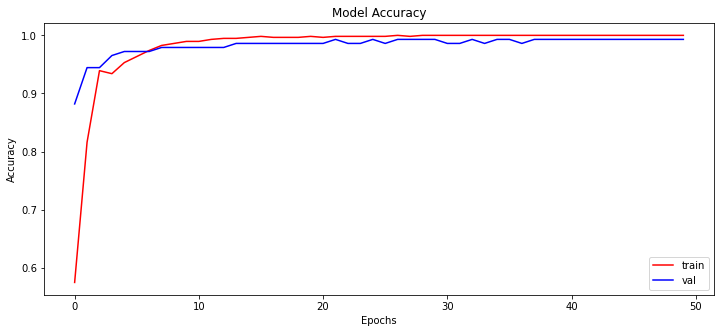

In [58]:
# Plot the Training History
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['train','val'])
plt.show()

In [74]:
print("[INFO] Calculating Model Accruacy")
scores = model.evaluate(x_test, y_test)
test_accuracy = round(scores[1]*100, 2)
print(f"Test Accuracy:", test_accuracy, "%")

[INFO] Calculating Model Accruacy
6/6 [==============================] - 1s 165ms/step - loss: 0.0262 - accuracy: 0.9889
Test Accuracy: 98.89 %


In [60]:
y_pred = model.predict(x_test)

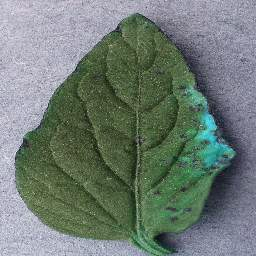

In [64]:
# Plotting Image to Compare
img = array_to_img(x_test[15])
img

In [65]:
# Finding Max Value from Prediction List and comparing Original Value vs Predicted
print("Actual: ", all_labels[np.argmax(y_test[15])])
print("Predicted: ", all_labels[np.argmax(y_pred[15])])

Actual:  Tomato-Bacterial_spot
Predicted:  Tomato-Bacterial_spot


Upon Normalizing the data, a CNN Model was then created. This was used to predict the plant diseases based on the uploaded image, which would then be comapred to the model. This would be highly beneficial in Agriculture as farmers would be able to identify the disease their plant is dealing with and take necessary actions.